<h2>AMATH 342 HW5</h2>

Richard Feynman once wrote on a chalkboard:

    'What I cannot create, I do not understand.'

When the first artificial cell was created they wrote that into its genome.
In that spirit lets build some neural nets!

<h2>Problem 1.</h2>

Create a function that computes the output of a perceptron with a bias term, and a RELU non-linearity.

$$O = max(0, \vec{w} \cdot \vec{\epsilon} + \theta{})$$

Below are all the pieces you need to do this, just put them together in a function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline  

bias = -1
wts = np.array([1,1])
eps = np.array([-1,1])
the_dot_product = np.dot(wts, eps) 
print('Dot product of wts and eps = ' + str(output))

the_max = np.max([0, -2])
print('Max([0, -2])= ' + str(the_max))


NameError: name 'output' is not defined

In [3]:
def perceptron(wts, eps, bias):
    #fill in this function appropriately
    output = 
    return output

Now lets test your function, we will be using exactly the same parameter examples for the first perceptron from class so we should see exactly what we predicted in class.

In [4]:
#lets get a mesh of points to plot
grid_npts = 30
grid_bnds = 4
grid_x = grid_y = np.linspace(-grid_bnds, grid_bnds, grid_npts)
grid = np.array(np.meshgrid(grid_x,grid_y)).reshape(2, grid_npts**2)
print(grid.shape)

(2, 900)


[[-4.         -3.72413793 -3.44827586 ...,  3.44827586  3.72413793  4.        ]
 [-4.         -4.         -4.         ...,  4.          4.          4.        ]]


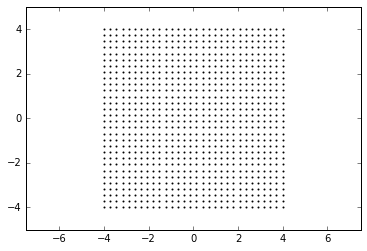

In [5]:
#now plot them
plt.scatter(grid[0], grid[1], s=1)
print(grid)
_=plt.axis('equal')

Now lets run each of these points through your perceptron:

In [6]:
bias = 1
wts = np.array([1,1])
out = np.array([perceptron(wts, eps, bias) for eps in grid.T])
#if you got an error here there is something wrong with your perceptron!

In [7]:
#now lets get the ones the ones over zero
above_thresh = out!=0
dot_colors = np.zeros((np.shape(grid)[1], 3))

dot_colors[above_thresh, :] = np.array([0,1,0])
_ = plt.scatter(grid[0], grid[1], s=10, c=dot_colors, edgecolors='none')
_ = plt.axis('equal')

IndexError: too many indices for array

In this plot, the green points got a response above zero, and the black at zero.
Now what you should have gotten was a linear boundary. You have built a one layer net

<h2>Problem 2.</h2>
Now you will need to build a two layer net. Luckily a two layer net is simply two perceptrons stacked on top of each other. The first takes the raw input, and the second takes as its input the output of the first one.
Your goal will be to have a two layer net which has non-zero response to positions on the grid which satisfy the constraints: x > 1 and y < 2.
Let me draw a picture:

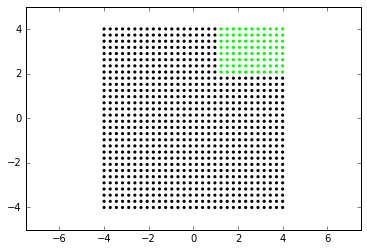

In [8]:
#now lets get the ones the ones over zero
above_thresh = (grid[0]>1) * (grid[1]>2) 
dot_colors = np.zeros((np.shape(grid)[1], 3))
dot_colors[above_thresh, :] = np.array([0,1,0])
_ = plt.scatter(grid[0], grid[1], s=10, c=dot_colors, edgecolors='none')
_ = plt.axis('equal')

So if your run this grid through your neural net you should get the exact same pattern of non-zero dots.

Now you are about to have a terrible urge to start messing around with the numbers below to get the graph to look how you want it to look. But trust me, you will be less stressed, it will take less time, and you will learn more if you sit down with a pen and paper and figure it out first.

In [17]:
#the convention here is wts#_# where the first number is the layer and the 2nd number is which perceptron 
#it is in the layer. Now replace the values below to approximate the function above.
wts1_1 = np.array([0,0])
bias1_1 = 0

wts1_2 = np.array([0,0])
bias1_2 = 0

wts2_1 = np.array([0,0])
bias2_1 = 0

def two_layer_net(eps, bias1_1, wts1_1, bias1_2, wts1_2, bias2_1, wts2_1):
    #complete this function
    resp = []
    return resp
    
out = np.array([two_layer_net(eps, bias1_1, wts1_1, bias1_2, wts1_2, bias2_1, wts2_1) for eps in grid.T])

In [29]:
#plot your results
above_thresh = out>0
dot_colors = np.zeros((np.shape(grid)[1], 3))

dot_colors[above_thresh, :] = np.array([0,1,0])
_ = plt.scatter(grid[0], grid[1], s=10, c=dot_colors, edgecolors='none')
_ = plt.axis('equal')

IndexError: too many indices for array

<h2>Problem 3</h2>
<h3>Building a Complex Cell</h3>
Now you are going to build a model of a complex cell. But to do that we will start with a simple cell.

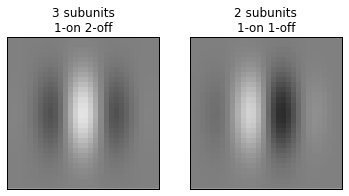

In [19]:
radial_dist = np.sqrt(np.sum(grid**2,0))#reuse our grid and calculate distance from center for each point

#the receptive field will be a guassian
width = 1.5
receptive_field = (1/(np.sqrt(2*np.pi*width**2)))*np.exp(-radial_dist**2/(2*width**2))

#the weights wil be a sinusoidal pattern
sinusoid = np.cos(grid[0]*1.5)

#reshape the receptive field and grating back into a square
receptive_field = receptive_field.reshape(30,30) 

#multiply the receptive field and sinusoid to get an approximation to a simple cell
simple_cell_wts_3subunit = receptive_field*sinusoid.reshape(30,30)
simple_cell_wts_3subunit = simple_cell_wts_3subunit/np.sum(simple_cell_wts_3subunit**2)

sinusoid = np.cos(grid[0]*1.5+np.pi/2).reshape(30,30)
simple_cell_wts_2subunit = receptive_field*sinusoid
simple_cell_wts_2subunit = simple_cell_wts_2subunit/np.sum(simple_cell_wts_2subunit**2)

plt.subplot(121)
plt.imshow(simple_cell_wts_3subunit, cmap=cm.gray, interpolation='none',vmin=-0.1,vmax=0.1)
plt.xticks([]);plt.yticks([]);
plt.title('3 subunits\n1-on 2-off')

plt.subplot(122)
plt.imshow(simple_cell_wts_2subunit, cmap=cm.gray, interpolation='none', vmin=-0.1,vmax=0.1)
plt.xticks([]);plt.yticks([]);
plt.title('2 subunits\n1-on 1-off')

If you performed STA on a bunch of simple cells these are basically the  two types of STA's you would get. The first has three subunits, an excitatory center flanked by inhibitory regions, and the the next has two subunits one excitatory one inhibtory. 

One way in which neurophysiologists determine whether something is a simple cell is by looking at its responses it a drifting sinusoid. Lets look at some frames of a drifting sinusoid.

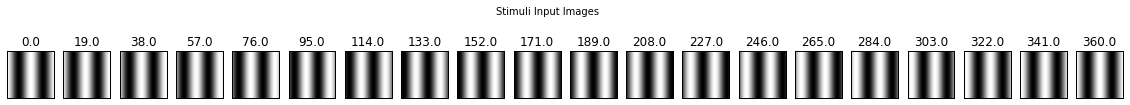

In [20]:
#make sinusoids of incrementally changing phase
plt.figure(figsize=(20,2))
phases = np.linspace(0, 2*np.pi, 20)
sinusoids = np.array([np.cos(grid[0]*1.5+phase).reshape(30,30) for phase in phases])

for i, sinusoid in enumerate(sinusoids):
    plt.subplot(1, len(phases), i+1)
    plt.xticks([]);plt.yticks([])
    plt.title(str(np.round(np.rad2deg(phases[i]),0)))
    plt.imshow(sinusoid, cmap=cm.gray)
sinusoids.shape
_ = plt.suptitle('Stimuli Input Images')

You can see from 0 to 360 degrees the sinusoid is slowly moving along till wraps back around to its original position.
You can imagine that as the sinusoid drifts sometimes the light portions of the sinusoid will be on the excitatory region thus driving the cell, and the dark parts on the inhbitory and thus the inhbitory parts are not driven to reduce the cell's response. You can imagine this would vary as a function of phase, as sometimes the light parts of the sinusoid will be be on the off-subunits, and the darks parts on the on-subunits and the cell will go below baseline.

A neurophysiologist would determine whether a cell was a simple-cell by measuring an F1/F0 ratio based on the response to a sinusoid input.

The procedure for measuring this ratio is to first subtract off the baseline firing rate (how much the cell fires to a blank screen). Then to measure the firing rate of the cell to sinusoids at many phases. Then to take this firing rate as function of phase and measure how much power there is at the fundamental frequency i.e. one rise and fall in firing per 360 degree's change in phase vs how much power is at F0 constant i.e. that no matter where the sinusoid is the cell is firing at about the same rate above baseline.

In [21]:
#using your perceptron function with a bias of 10 please collect and plot the responses of the two cell-types to the sinusoids
#with the baseline firing rate subtracted off, so subtract off the response when you put in a stimuli of all zeros.

#a function you might find helpful is .ravel() which takes an array and unravels it into a vector
#because your perceptron acts only on vectors, you'll need to vectorize your images.
a = np.ones((4,4))
print(a.shape)
b = np.ravel(a)
print(b.shape)

(4, 4)
(16,)


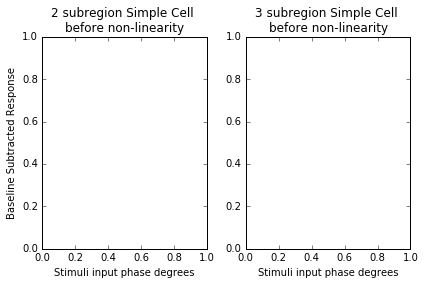

In [23]:
bias = 10

#get the responses of the simple cells here and plot them with respect to the phase of the sinusoids
#phases are in the phases variable. sinusoids are in the sinusoids variable. weights of the two perceptrons
#are in simple_cell_wts_2subunit and simple_cell_wts_3subunit

plt.subplot(121)
plt.xlabel('Stimuli input phase degrees');plt.ylabel('Baseline Subtracted Response');
plt.title('2 subregion Simple Cell \nbefore non-linearity')

plt.subplot(122)
plt.xlabel('Stimuli input phase degrees');
plt.title('3 subregion Simple Cell \nbefore non-linearity')
plt.tight_layout()

You should in the first figure get something that looks like a sine wave and in the second a cosine.

These cells would have a high F1/F0 ratio because they are oscillating at the fundamental frequency, one cycle for one cycle of the sinusoid.

A complex cell on the other hand would have a very low F1/F0 ratio because complex cells respond strongly to the sinusoid no matter where it is in the receptive field.

Your goal is to create a 2 or 3 layer network with the 3 and the 2 subregion simple cells as inputs and organize the subseqent layer(s) (how many units, what weights, what biases) so that the cell responds to an input sinusoid at a nearly constant rate no matter where it is in the receptive field. You might be tempted to just have a high bias so that the cell responds with a high constant rate to any stimuli but the F1/F0 ratio is calculated after subtracting baseline response, presenting the cell with a black screen.

One hint is to plot the output of the 2 subunit simple cell against that of the 3-subunit simple cell (without the baseline subtracted). In addition plot the baseline response of the cells against each other on the same plot in a different color. Now think about how the baseline is the lowest point on the response surface, and all the other points should be at about the same height for a complex cell. What kind of surface does that make, and how can you approximate that surface with your second layer units.

Final hint: Ideally you would use an inverted cone, but you will need to roughly approximate one.

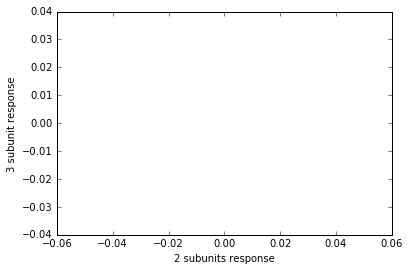

In [28]:
#plt.scatter(resp2, resp3)
#plt.scatter(base_line_resp2, base_line_resp3, c='r')
plt.xlabel('2 subunits response'); plt.ylabel('3 subunit response')
_=plt.axis('equal')

In [25]:
#here I am adding in an image of zeros to the stack of sinusoids so you can get the baseline response of your cell.
sinusoids_wbsln = np.concatenate([sinusoids, np.zeros((1,) + np.shape(sinusoids[0]))])

#you'll ned to complete these
bias1 = np.array([])#list of biases for each unit
wts1 = [np.array([]),]#list of list weights for units
bias2 = np.array([])
wts2 = [np.array([]),]
bias3 = np.array([])
wts3 = [np.array([]),]

#then pass the sinusoids through the net using the parameters above.
#and record the responses of your complex cell in resp
resp = []

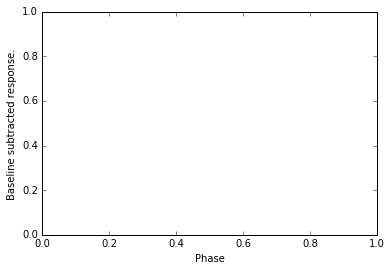

In [27]:
#now plot your response with the last response subtracted off (subtracting off the baseline)
#plt.plot(np.rad2deg(phases), resp[:-1] - resp[-1])
plt.xlabel('Phase');plt.ylabel('Baseline subtracted response.');

You should end up with a plot of a response where no matter the sinusoids phase the response stayed pretty high (doesn't go to zero/baseline), though there may be some variation because you were only approximating the appropriate function.

<h3>Extra Credit:</h3>
Write down an equation for the ideal function, where only the amplitude but not phase of the input sinusoids would create variation in the response of the complex cell, call the response of the first cell a, and the second b.

<h3>Future Directions:</h3>
If you are interested in these nets you might want to look at the book:

*Introduction To The Theory Of Neural Computation (Santa Fe Institute Series)* 

Its a classic and very informative. Back propagation is of particular interest as it allows you to train these nets without having to choose parameters by hand!
